# DSD-2023 Project (CIFAR-10)
---
## Simple python inference implementation
- This is a pytorch implementation of CIFAR-10 inference to help you understand how ML inference works

## Usage
- Run all the cells to see how ML inference works

In [4]:
from utils.layers_cifar10 import *
from utils.bit_operation import *
from utils.setup_cifar10 import *
from utils.scale_uart import *
import time
import numpy as np

## Download the CIFAR-10 dataset         

https://www.cs.toronto.edu/~kriz/cifar.html

---

In [5]:
download_dataset()

Download the CIFAR-10 dataset from https://www.cs.toronto.edu/~kriz/cifar.html
Finish download the CIFAR-10 dataset.


### Unzip the gz file into ubyte

In [6]:
unzip_cifar10("./data/dataset_cifar10/cifar-10-python.tar.gz")

## Load the CIFAR-10 dataset
---

In [7]:
# TRAIN SET
X_train, y_train = load_CIFAR10_batch("data_batch_1")
# TEST SET
X_test, y_test = load_CIFAR10_test()
# TEST ORIGIN for generating images
X_test_origin, _ = load_CIFAR10_test()

### Mask the number of dataset

In [8]:
X_test = X_test[range(100)]

### Show example CIFAR-10 Image

In [9]:
label_list = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", \
              "Horse", "Ship", "Truck"]

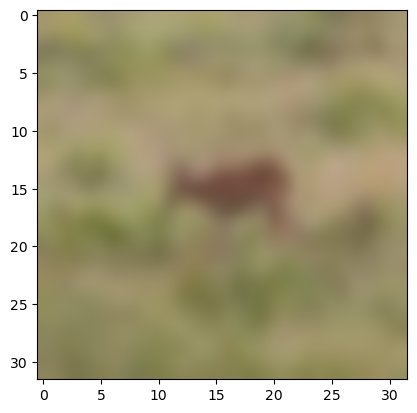

Label: 4 (Deer)


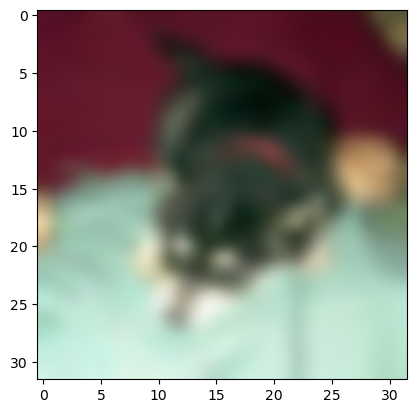

Label: 5 (Dog)


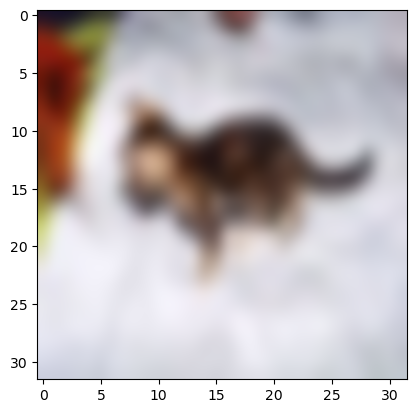

Label: 3 (Cat)


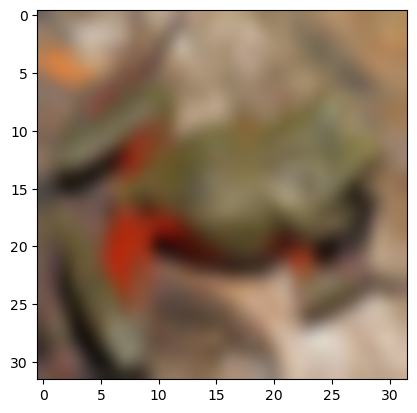

Label: 6 (Frog)


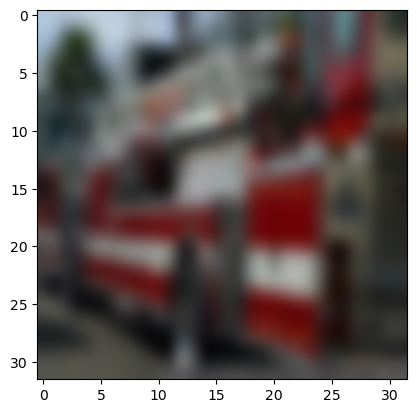

Label: 9 (Truck)


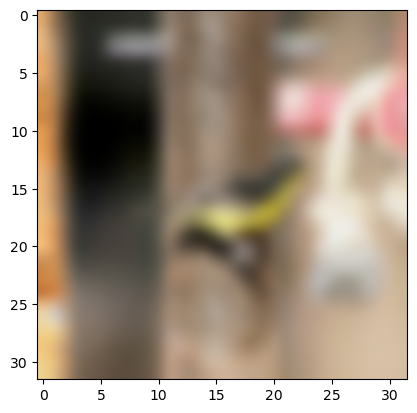

Label: 2 (Bird)


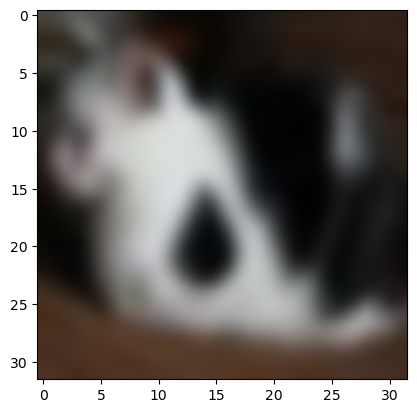

Label: 3 (Cat)


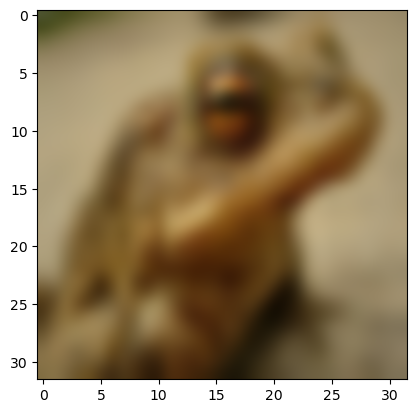

Label: 6 (Frog)


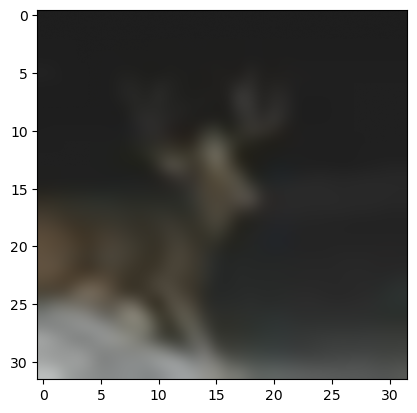

Label: 4 (Deer)


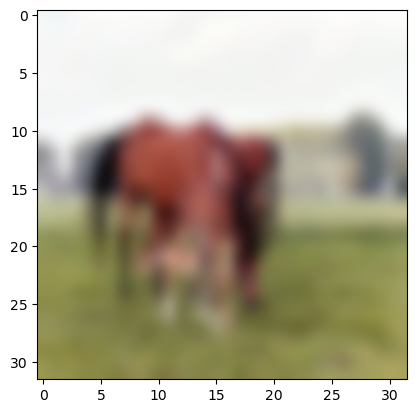

Label: 7 (Horse)


In [10]:
for i in range(10):
    key = np.random.randint(10000)
    gen_image(X_test_origin[key]).show()
    print("Label: %d (%s)" %(y_test[key], label_list[y_test[key]]))

## Preprocess the dataset (normalize)  

It will be **not included** in out PROJECT IMPLEMENATION.

---

CIFAR-10 Loader have already done the normalization (So, X_train /= 255 will be skipped.)

In [11]:
mean = [np.mean(X_train[:, 0, :, :]), np.mean(X_train[:, 1, :, :]), np.mean(X_train[:, 2, :, :])]
std = [np.std(X_train[:, 0, :, :]), np.std(X_train[:, 2, :, :]), np.std(X_train[:, 2, :, :])]
print("mean:\t%.4f, %.4f, %.4f" %(mean[0], mean[1], mean[2]))
print("std:\t%.4f, %.4f, %.4f" %(std[0], std[1], std[2]))

mean:	0.4935, 0.4834, 0.4472
std:	0.2476, 0.2626, 0.2626


In [12]:
# Data Pre-processing
m = [0.4935, 0.4834, 0.4472]
std = [0.2476, 0.2626, 0.2626]

In [13]:
# Only pre-process the test dataset
X_test = np.reshape(X_test, (X_test.shape[0], 3, 32, 32))
for i in range(3):
    X_test[:,i,:,:] = (X_test[:,i,:,:]-m[i])/std[i]

## Train  
---
It is already done by TAs.  
So just load the pre-trained network parameters!

### Simulation data for our 8-bit MAC unit

In [14]:
# Pre quantized dataset
X_test_ = np.load("./data/cifar10_dataset_quan/images_100.npy")

## Load network parameter
---

In [15]:
# Load network param
conv1_w = np.load("./data/cifar10_network_param/cifar10_conv1_weight.npy")
conv1_b = np.load("./data/cifar10_network_param/cifar10_conv1_bias.npy")
conv2_w = np.load("./data/cifar10_network_param/cifar10_conv2_weight.npy")
conv2_b = np.load("./data/cifar10_network_param/cifar10_conv2_bias.npy")
conv3_w = np.load("./data/cifar10_network_param/cifar10_conv3_weight.npy")
conv3_b = np.load("./data/cifar10_network_param/cifar10_conv3_bias.npy")
conv4_w = np.load("./data/cifar10_network_param/cifar10_conv4_weight.npy")
conv4_b = np.load("./data/cifar10_network_param/cifar10_conv4_bias.npy")
conv5_w = np.load("./data/cifar10_network_param/cifar10_conv5_weight.npy")
conv5_b = np.load("./data/cifar10_network_param/cifar10_conv5_bias.npy")
conv6_w = np.load("./data/cifar10_network_param/cifar10_conv6_weight.npy")
conv6_b = np.load("./data/cifar10_network_param/cifar10_conv6_bias.npy")
fc1_w =   np.load("./data/cifar10_network_param/cifar10_fc1_weight.npy")
fc1_b =   np.load("./data/cifar10_network_param/cifar10_fc1_bias.npy")
fc2_w =   np.load("./data/cifar10_network_param/cifar10_fc2_weight.npy")
fc2_b =   np.load("./data/cifar10_network_param/cifar10_fc2_bias.npy")
fc3_w =   np.load("./data/cifar10_network_param/cifar10_fc3_weight.npy")
fc3_b =   np.load("./data/cifar10_network_param/cifar10_fc3_bias.npy")

In [16]:
# Load quantized network param
conv1_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv1_weight_quan.npy")
conv1_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv1_bias_quan.npy")
conv2_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv2_weight_quan.npy")
conv2_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv2_bias_quan.npy")
conv3_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv3_weight_quan.npy")
conv3_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv3_bias_quan.npy")
conv4_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv4_weight_quan.npy")
conv4_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv4_bias_quan.npy")
conv5_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv5_weight_quan.npy")
conv5_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv5_bias_quan.npy")
conv6_w_ = np.load("./data/cifar10_network_quan_param/cifar10_conv6_weight_quan.npy")
conv6_b_ = np.load("./data/cifar10_network_quan_param/cifar10_conv6_bias_quan.npy")
fc1_w_ =   np.load("./data/cifar10_network_quan_param/cifar10_fc1_weight_quan.npy")
fc1_b_ =   np.load("./data/cifar10_network_quan_param/cifar10_fc1_bias_quan.npy")
fc2_w_ =   np.load("./data/cifar10_network_quan_param/cifar10_fc2_weight_quan.npy")
fc2_b_ =   np.load("./data/cifar10_network_quan_param/cifar10_fc2_bias_quan.npy")
fc3_w_ =   np.load("./data/cifar10_network_quan_param/cifar10_fc3_weight_quan.npy")
fc3_b_ =   np.load("./data/cifar10_network_quan_param/cifar10_fc3_bias_quan.npy")

## Test for accuracy  
---

In [17]:
conv_param = {'stride': 1, 'pad': 1}
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

In [18]:
def inference(data):
    # CONV1 with MAXPOOL
    conv1_out = conv(data, conv1_w, conv1_b, conv_param)
    relu1_out = relu(conv1_out)
    pool1_out = maxpool(relu1_out, pool_param)
    
    # CONV2 with MAXPOOL
    conv2_out = conv(pool1_out, conv2_w, conv2_b, conv_param)
    relu2_out = relu(conv2_out)
    pool2_out = maxpool(relu2_out, pool_param)
    
    # CONV3 with MAXPOOL
    conv3_out = conv(pool2_out, conv3_w, conv3_b, conv_param)
    relu3_out = relu(conv3_out)
    
    # CONV4 with MAXPOOL
    conv4_out = conv(relu3_out, conv4_w, conv4_b, conv_param)
    relu4_out = relu(conv4_out)
    pool4_out = maxpool(relu4_out, pool_param)
    
    # CONV5 with MAXPOOL
    conv5_out = conv(pool4_out, conv5_w, conv5_b, conv_param)
    relu5_out = relu(conv5_out)
    
    # CONV6 with MAXPOOL
    conv6_out = conv(relu5_out, conv6_w, conv6_b, conv_param)
    relu6_out = relu(conv6_out)
    pool6_out = maxpool(relu6_out, pool_param)
    
    # Flatten for FC's input
    flat = np.reshape(pool6_out, (1024,))
    
    # Fully-Connected 1
    fc1_out = fully_connected(flat, fc1_w, fc1_b)
    relu7_out = relu(fc1_out)
    
    # Fully-Connected 2
    fc2_out = fully_connected(relu7_out, fc2_w, fc2_b)
    relu8_out = relu(fc2_out)
    
    # Fully-Connected 1
    fc3_out = fully_connected(relu8_out, fc3_w, fc3_b)
    # !!! EXCLUSION OF RELU ON LAST LAYER !!!
    return fc3_out

In [19]:
def inference_quan(data):
    # CONV1 with MAXPOOL
    conv1_out = conv(data, conv1_w_, conv1_b_, conv_param)
    relu1_out = relu(conv1_out)
    relu1_out = to_8bit_fixed(relu1_out)
    pool1_out = maxpool(relu1_out, pool_param)
    # EACH OUTPUT MUST BE TRANSLATED INTO 8-BIT FORM
    pool1_out_ = to_8bit_fixed(pool1_out)
    
    # CONV2 with MAXPOOL
    conv2_out = conv(pool1_out_, conv2_w_, conv2_b_, conv_param)
    relu2_out = relu(conv2_out)
    relu2_out = to_8bit_fixed(relu2_out)
    pool2_out = maxpool(relu2_out, pool_param)
    # EACH OUTPUT MUST BE TRANSLATED INTO 8-BIT FORM
    pool2_out_ = to_8bit_fixed(pool2_out)
    
    # CONV3 with MAXPOOL
    conv3_out = conv(pool2_out_, conv3_w_, conv3_b_, conv_param)
    relu3_out = relu(conv3_out)
    # EACH OUTPUT MUST BE TRANSLATED INTO 8-BIT FORM
    relu3_out_ = to_8bit_fixed(relu3_out)
    
    # CONV4 with MAXPOOL
    conv4_out = conv(relu3_out_, conv4_w_, conv4_b_, conv_param)
    relu4_out = relu(conv4_out)
    relu4_out = to_8bit_fixed(relu4_out)
    pool4_out = maxpool(relu4_out, pool_param)
    # EACH OUTPUT MUST BE TRANSLATED INTO 8-BIT FORM
    pool4_out_ = to_8bit_fixed(pool4_out)
    
    # CONV5 with MAXPOOL
    conv5_out = conv(pool4_out_, conv5_w_, conv5_b_, conv_param)
    relu5_out = relu(conv5_out)
    relu5_out = to_8bit_fixed(relu5_out)
    # EACH OUTPUT MUST BE TRANSLATED INTO 8-BIT FORM
    relu5_out_ = to_8bit_fixed(relu5_out)
    
    # CONV6 with MAXPOOL
    conv6_out = conv(relu5_out_, conv6_w_, conv6_b_, conv_param)
    relu6_out = relu(conv6_out)
    relu6_out = to_8bit_fixed(relu6_out)
    pool6_out = maxpool(relu6_out, pool_param)
    # EACH OUTPUT MUST BE TRANSLATED INTO 8-BIT FORM
    pool6_out_ = to_8bit_fixed(pool6_out)
    
    # Flatten for FC's input
    flat = np.reshape(pool6_out_, (1024,))
    
    # Fully-Connected 1
    fc1_out = fully_connected(flat, fc1_w_, fc1_b_)
    relu7_out = relu(fc1_out)
    # EACH OUTPUT MUST BE TRANSLATED INTO 8-BIT FORM
    fc1_out_ = to_8bit_fixed(relu7_out)
    
    # Fully-Connected 2
    fc2_out = fully_connected(fc1_out_, fc2_w_, fc2_b_)
    relu8_out = relu(fc2_out)
    # EACH OUTPUT MUST BE TRANSLATED INTO 8-BIT FORM
    fc2_out_ = to_8bit_fixed(relu8_out)
    
    # Fully-Connected 1
    fc3_out = fully_connected(fc2_out_, fc3_w_, fc3_b_)
    # !!! EXCLUSION OF RELU ON LAST LAYER !!!
    # CAN SKIP THE QUNATIZATION STEP B.C WE ALLOW 16-BIT OUTCOME ON LAST
    return fc3_out

In [20]:
def check_accuracy(data):
    num_img = data.shape[0]
    pred_label = list()
    scores = list()
    for idx in range(num_img):
        score = inference(data[idx].reshape((1, 3, 32, 32)))
        scores.append(score)
        print("Progress: {:05.2f}%".format(100*idx/(num_img-1)), end="\r", flush=True)
        pred_label.append(np.argmax(score, axis=0))
    return scores, pred_label

In [21]:
def check_accuracy_quan(data):
    num_img = data.shape[0]
    pred_label = list()
    scores = list()
    for idx in range(num_img):
        score = inference_quan(data[idx].reshape((1, 3, 32, 32)))
        scores.append(score)
        print("Progress: {:05.2f}%".format(100*(idx+1)/100), end="\r", flush=True)
        pred_label.append(np.argmax(score, axis=0))
    return scores, pred_label

## Do inference and Check the accuracy
---

### CHECK MASKED DATA (range 100)

In [22]:
# 100 images quantized predict
start = time.time()
scores_mask_quan, pred_mask_quan = check_accuracy_quan(X_test_)
print("Total time: {:.2f} sec".format(time.time() - start))

Total time: 164.29 sec


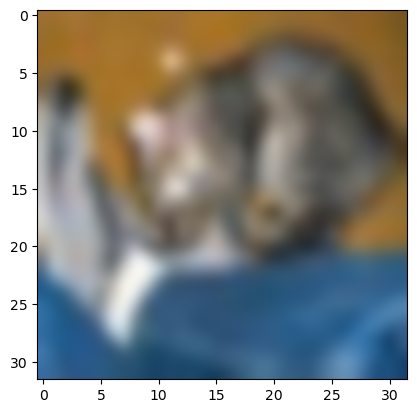

Label: 3 (Cat)
Predict: 3 (Cat)


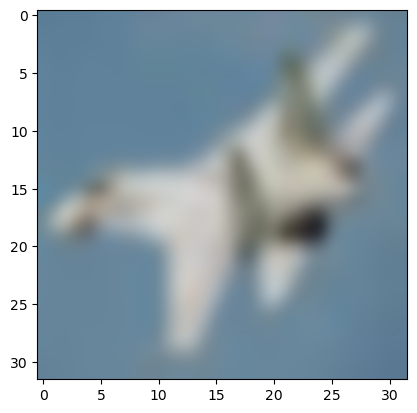

Label: 0 (Airplane)
Predict: 0 (Airplane)


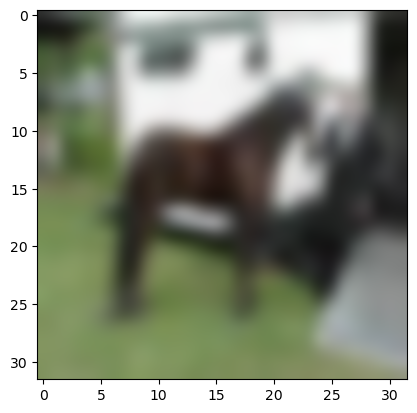

Label: 7 (Horse)
Predict: 7 (Horse)


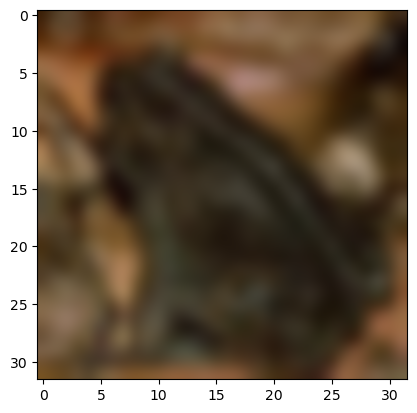

Label: 6 (Frog)
Predict: 6 (Frog)


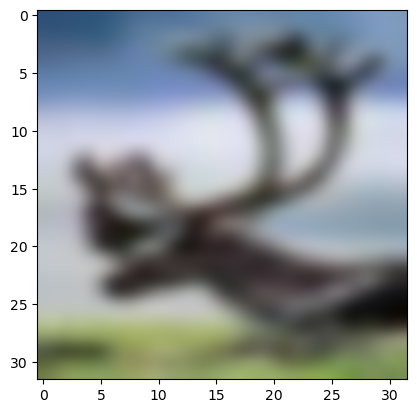

Label: 4 (Deer)
Predict: 4 (Deer)


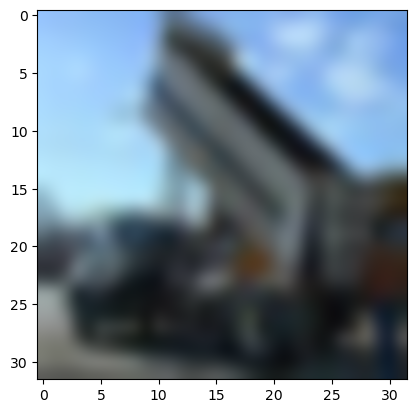

Label: 9 (Truck)
Predict: 9 (Truck)


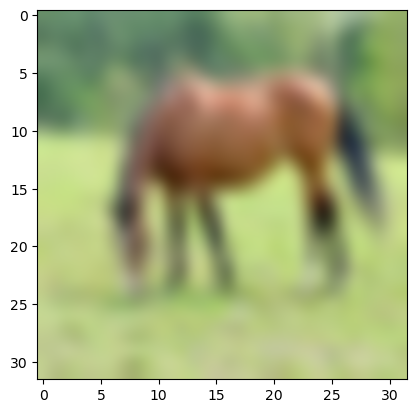

Label: 7 (Horse)
Predict: 7 (Horse)


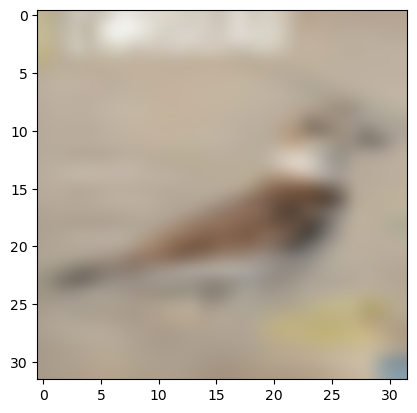

Label: 2 (Bird)
Predict: 4 (Deer)


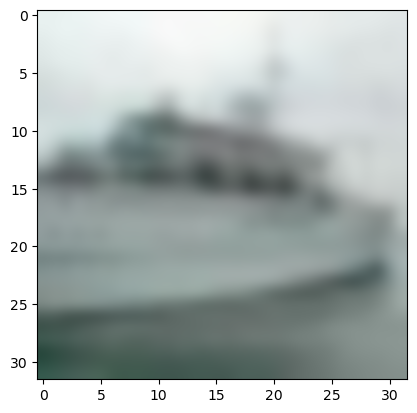

Label: 8 (Ship)
Predict: 8 (Ship)


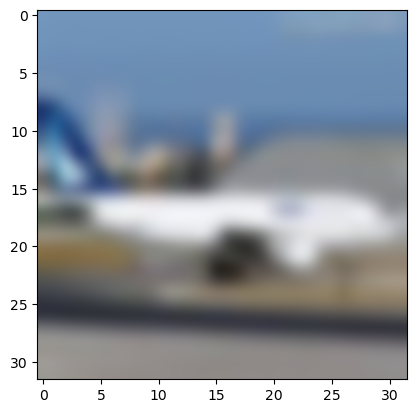

Label: 0 (Airplane)
Predict: 0 (Airplane)
	100 images accuracy: 77.00%


In [23]:
acc = 0
for i in range(100):
    if pred_mask_quan[i] == y_test[i]:
        acc += 1
    if i % 10 == 0:
        gen_image(X_test_origin[i]).show()
        print("Label: %d (%s)" %(y_test[i], label_list[y_test[i]]))
        print("Predict: %d (%s)" %(pred_mask_quan[i], label_list[pred_mask_quan[i]]))
print("\t100 images accuracy: {:.2f}%".format(acc/100 * 100))

In [24]:
# 100 images predict
start = time.time()
scores_mask, pred_mask = check_accuracy(X_test)
print("Total time: {:.2f} sec".format(time.time() - start))

Total time: 156.94 sec


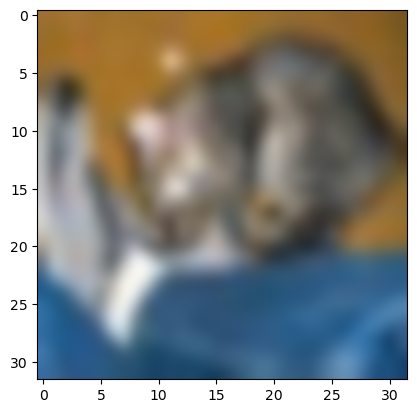

Label: 3 (Cat)
Predict: 3 (Cat)


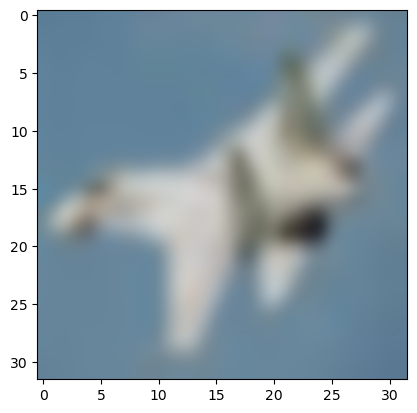

Label: 0 (Airplane)
Predict: 0 (Airplane)


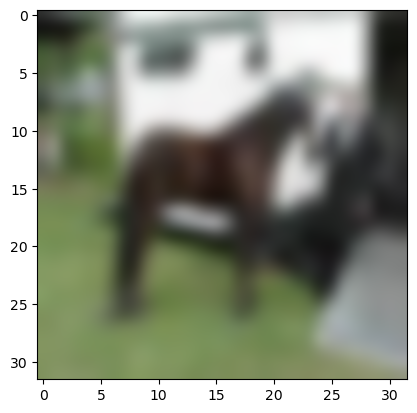

Label: 7 (Horse)
Predict: 7 (Horse)


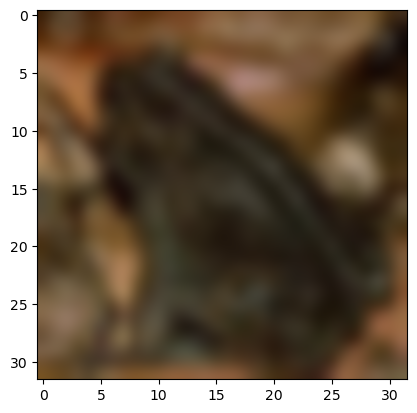

Label: 6 (Frog)
Predict: 6 (Frog)


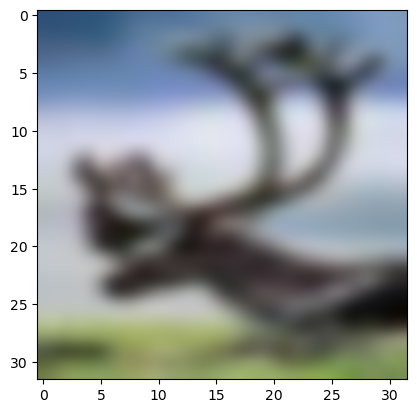

Label: 4 (Deer)
Predict: 4 (Deer)


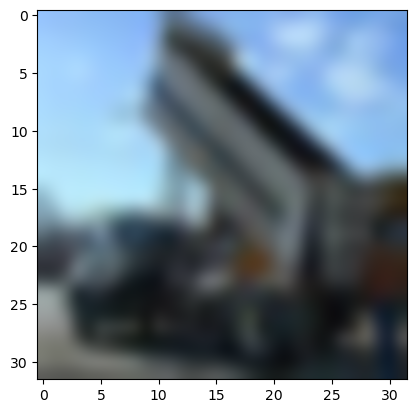

Label: 9 (Truck)
Predict: 9 (Truck)


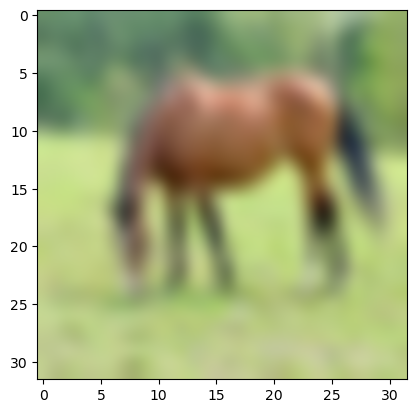

Label: 7 (Horse)
Predict: 7 (Horse)


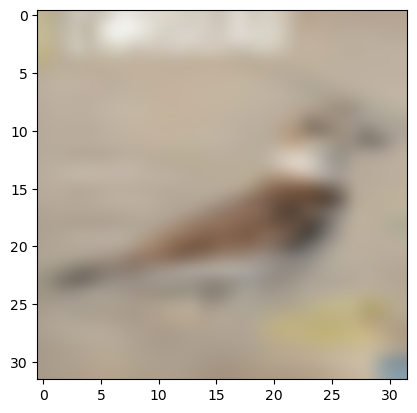

Label: 2 (Bird)
Predict: 2 (Bird)


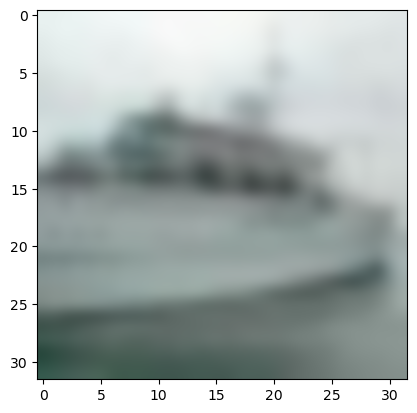

Label: 8 (Ship)
Predict: 8 (Ship)


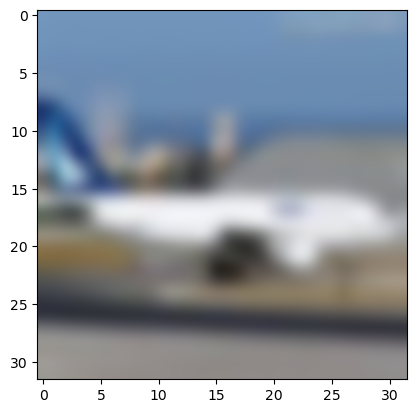

Label: 0 (Airplane)
Predict: 0 (Airplane)
	100 images accuracy: 90.00%


In [25]:
acc = 0
for i in range(100):
    if pred_mask[i] == y_test[i]:
        acc += 1
    if i % 10 == 0:
        gen_image(X_test_origin[i]).show()
        print("Label: %d (%s)" %(y_test[i], label_list[y_test[i]]))
        print("Predict: %d (%s)" %(pred_mask[i], label_list[pred_mask[i]]))
print("\t100 images accuracy: {:.2f}%".format(acc/100 * 100))

### How to debug and Check the output?

---  
In software_inference, you can see the result data by below code.  
You can revise this code for checking your own.  
**ALL YOUR DATA IN THIS FORMAT WILL BE PRINTED WITH BIG ENDIAN**  
**ON DRAM, DATA WERE STORED IN LITTLE ENDIAN ORDER**  
So, you should read in reversed order

example:

below result:
[1, 11, 2, 22]

Then on DRAM:
[22, 2, 11, 1]

In [26]:
conv1_out = conv(X_test_[0].reshape(1, 3, 32, 32), conv1_w_, conv1_b_, conv_param)
relu1_out = relu(conv1_out)
relu1_out_quan = to_8bit_fixed(relu1_out)
relu1_out_bin = to_8bit_fixed_binary(relu1_out)

In [27]:
print(relu1_out_quan.shape)

(1, 32, 32, 32)


In [28]:
flat_convrelu1 = relu1_out_quan.flatten()               

In [29]:
# Print in 4 Bytes
for i in range(int(1 * 3 * 32 * 32 / 4)):
    temp = flat_convrelu1[i*4:i*4+4]
    print(i, "\t", temp)

0 	 [0.       0.125    0.140625 0.      ]
1 	 [0.03125 0.28125 0.0625  0.125  ]
2 	 [0.109375 0.03125  0.125    0.125   ]
3 	 [0.203125 0.140625 0.03125  0.      ]
4 	 [0.       0.078125 0.1875   0.0625  ]
5 	 [0.       0.09375  0.0625   0.203125]
6 	 [0.140625 0.21875  0.1875   0.171875]
7 	 [0.15625  0.109375 0.1875   1.125   ]
8 	 [0.      0.03125 0.      0.     ]
9 	 [0.015625 0.0625   0.       0.      ]
10 	 [0.     0.0625 0.     0.    ]
11 	 [0.       0.       0.       0.046875]
12 	 [0.09375  0.015625 0.       0.      ]
13 	 [0.       0.       0.       0.046875]
14 	 [0.     0.1875 0.     0.    ]
15 	 [0.       0.0625   0.09375  0.171875]
16 	 [0.125    0.109375 0.       0.      ]
17 	 [0.265625 0.015625 0.       0.      ]
18 	 [0.       0.09375  0.296875 0.3125  ]
19 	 [0.       0.       0.109375 0.0625  ]
20 	 [0.       0.       0.       0.140625]
21 	 [0.15625  0.203125 0.       0.      ]
22 	 [0.       0.       0.203125 0.3125  ]
23 	 [0.078125 0.03125  0.       0.125   ]
24

In [30]:
flat_convrelu_bin1 = relu1_out_bin.flatten()               

In [31]:
# Print in 4 Bytes
for i in range(int(1 * 3 * 32 * 32 / 4)):
    temp = flat_convrelu_bin1[i*4:i*4+4]
    print(i, "\t", temp)

0 	 [0. 8. 9. 0.]
1 	 [ 2. 18.  4.  8.]
2 	 [7. 2. 8. 8.]
3 	 [13.  9.  2.  0.]
4 	 [ 0.  5. 12.  4.]
5 	 [ 0.  6.  4. 13.]
6 	 [ 9. 14. 12. 11.]
7 	 [10.  7. 12. 72.]
8 	 [0. 2. 0. 0.]
9 	 [1. 4. 0. 0.]
10 	 [0. 4. 0. 0.]
11 	 [0. 0. 0. 3.]
12 	 [6. 1. 0. 0.]
13 	 [0. 0. 0. 3.]
14 	 [ 0. 12.  0.  0.]
15 	 [ 0.  4.  6. 11.]
16 	 [8. 7. 0. 0.]
17 	 [17.  1.  0.  0.]
18 	 [ 0.  6. 19. 20.]
19 	 [0. 0. 7. 4.]
20 	 [0. 0. 0. 9.]
21 	 [10. 13.  0.  0.]
22 	 [ 0.  0. 13. 20.]
23 	 [5. 2. 0. 8.]
24 	 [19. 10.  0.  0.]
25 	 [0. 0. 0. 0.]
26 	 [ 0.  9. 87. 14.]
27 	 [0. 0. 0. 0.]
28 	 [ 0.  0. 82. 62.]
29 	 [23.  0.  0.  4.]
30 	 [ 0. 32.  5. 16.]
31 	 [9. 0. 0. 6.]
32 	 [13.  0.  0.  0.]
33 	 [0. 0. 0. 0.]
34 	 [ 1.  0. 20.  0.]
35 	 [0. 0. 0. 0.]
36 	 [  0. 104. 105.   0.]
37 	 [0. 0. 0. 0.]
38 	 [22.  0.  0.  7.]
39 	 [33. 11.  2. 10.]
40 	 [ 0.  0.  0. 39.]
41 	 [44.  0.  0.  2.]
42 	 [4. 0. 0. 0.]
43 	 [89. 41.  0. 72.]
44 	 [85. 46.  0.  0.]
45 	 [ 0.  0.  0. 47.]
46 	 [0. 0. 2. 0.]
47 	 

In [32]:
# 11 in binary means that 
# 00001011 = 1 * (0.125 + 0.03125 + 0.015625) = 0.171875